In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import timeit

start = timeit.default_timer()

data = pd.read_csv('data/lowz_train.csv')
print(data)
N = len(data)

               objid  modelMag_u  modelMag_g  modelMag_r  modelMag_i  \
0       1.237650e+18    22.70128    21.55564    20.74338    19.97239   
1       1.237650e+18    24.56516    21.16984    19.37671    18.73236   
2       1.237650e+18    23.23910    21.44343    19.67306    18.94400   
3       1.237650e+18    24.05348    21.24721    19.39289    18.68024   
4       1.237650e+18    26.32478    20.74059    18.99681    18.29084   
...              ...         ...         ...         ...         ...   
499995  1.237660e+18    22.29897    22.93468    22.38542    21.28206   
499996  1.237660e+18    26.38703    23.38835    21.82336    20.77917   
499997  1.237660e+18    25.35958    22.80534    22.09689    21.29262   
499998  1.237660e+18    21.76572    21.04494    19.27338    18.35782   
499999  1.237660e+18    20.06860    18.70352    17.94416    17.49119   

        modelMag_z  fiberMag_u  fiberMag_g  fiberMag_r  fiberMag_i  ...  \
0         19.65203    23.26064    22.38317    21.52284    20

In [2]:
#Data Cleaning
from sklearn.impute import SimpleImputer
Imputer = SimpleImputer(missing_values =-9999, strategy='most_frequent')
Imputer.fit(data.values)
Imputer.transform(data.values)

Imputer = SimpleImputer(missing_values =0, strategy='most_frequent')
Imputer.fit(data.values)
Imputer.transform(data.values)

array([[1.2376500e+18, 2.2701280e+01, 2.1555640e+01, ..., 2.1953005e+01,
        2.1137710e+01, 2.0602890e+01],
       [1.2376500e+18, 2.4565160e+01, 2.1169840e+01, ..., 2.1011690e+01,
        1.9772945e+01, 1.9199900e+01],
       [1.2376500e+18, 2.3239100e+01, 2.1443430e+01, ..., 2.1472625e+01,
        2.0232370e+01, 1.9659590e+01],
       ...,
       [1.2376600e+18, 2.5359580e+01, 2.2805340e+01, ..., 2.3096115e+01,
        2.2377880e+01, 2.1573480e+01],
       [1.2376600e+18, 2.1765720e+01, 2.1044940e+01, ..., 2.1798940e+01,
        2.0480395e+01, 1.9807905e+01],
       [1.2376600e+18, 2.0068600e+01, 1.8703520e+01, ..., 1.9561455e+01,
        1.8941840e+01, 1.8595005e+01]])

Text(0, 0.5, 'Number of samples')

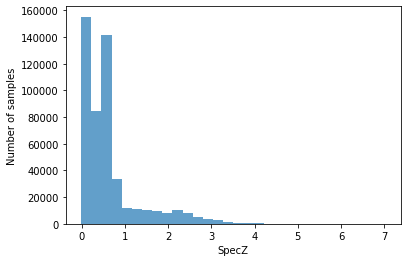

In [3]:
plt.hist(data['redshift'], bins=30, alpha=0.7)
plt.xlabel('SpecZ')
plt.ylabel('Number of samples')

In [4]:
#Refered from base paper. Topic-->[Logarithmic Domain] Pg 4
c=1
data['redshift1']=c*np.log10(data.redshift+1)

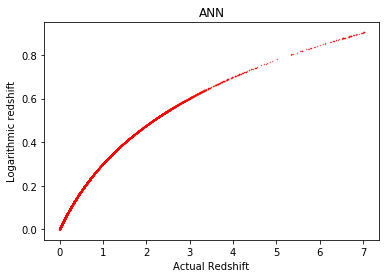

In [5]:
#plotting the graph of actual redshift vs logarithmic redshift
plt.scatter(data['redshift'].tolist()[:25000], data['redshift1'].tolist()[:25000], s=0.1, color="red")
plt.xlabel("Actual Redshift")
plt.ylabel("Logarithmic redshift")
plt.title("ANN")
plt.show()

In [6]:
#Refered from base paper. Page 5
#e = 2.71828
data['redshift2']=2.71828**(data['redshift1']-1)

In [7]:
#Check Page 3 and 4 from base paper
# Feature matrix

X=np.zeros((N,30))
X[: ,0] = data['modelMag_u']
X[: ,1] = data['modelMag_g']
X[: ,2] = data['modelMag_r']
X[: ,3] = data['modelMag_i']
X[: ,4] = data['modelMag_z']
X[: ,5] = data['modelMag_u'] - data['modelMag_g']
X[: ,6] = data['modelMag_g'] - data['modelMag_r']
X[: ,7] = data['modelMag_r'] - data['modelMag_i']
X[: ,8] = data['modelMag_i'] - data['modelMag_z']
X[: ,9] = data['fiberMag_u']
X[: ,10] = data['fiberMag_g']
X[: ,11] = data['fiberMag_r']
X[: ,12] = data['fiberMag_i']
X[: ,13] = data['fiberMag_z']
X[: ,14] = data['fiberMag_u'] - data['fiberMag_g']
X[: ,15] = data['fiberMag_g'] - data['fiberMag_r']
X[: ,16] = data['fiberMag_r'] - data['fiberMag_i']
X[: ,17] = data['fiberMag_i'] - data['fiberMag_z']
X[: ,18] = data['petroR50_r'] / data['petroR90_r']
X[: ,19] = data['petroR50_z'] / data['petroR90_z']
X[: ,20] = data['r'] - data['i']
X[: ,21] = data['i'] - data['z']
X[: ,22] = data['mmug']
X[: ,23] = data['mmgr']
X[: ,24] = data['mmri']
X[: ,25] = data['mmiz']
X[: ,26] = data['mfug']
X[: ,27] = data['mfgr']
X[: ,28] = data['mfri']
X[: ,29] = data['mfiz']
# Target vector
y = data['redshift2']

print(X)

[[22.70128  21.55564  20.74338  ... 21.953005 21.13771  20.60289 ]
 [24.56516  21.16984  19.37671  ... 21.01169  19.772945 19.1999  ]
 [23.2391   21.44343  19.67306  ... 21.472625 20.23237  19.65959 ]
 ...
 [25.35958  22.80534  22.09689  ... 23.096115 22.37788  21.57348 ]
 [21.76572  21.04494  19.27338  ... 21.79894  20.480395 19.807905]
 [20.0686   18.70352  17.94416  ... 19.561455 18.94184  18.595005]]


In [8]:
train_no=int((3*N)/4)
X_train=X[:train_no,:]
y_train=y[:train_no]
X_test=X[train_no:,:]
y_test=y[train_no:]
print('Training data has %d samples'%(train_no))
print('Test data has %d samples'%(N-train_no))
print(y_train)

Training data has 375000 samples
Test data has 125000 samples
0         0.460843
1         0.425345
2         0.427354
3         0.427494
4         0.425657
            ...   
374995    0.436591
374996    0.436538
374997    0.380081
374998    0.443648
374999    0.388256
Name: redshift2, Length: 375000, dtype: float64


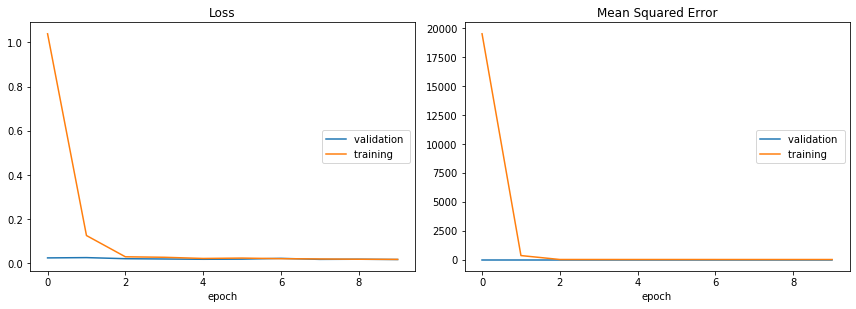

Loss
	validation       	 (min:    0.018, max:    0.026, cur:    0.018)
	training         	 (min:    0.018, max:    1.038, cur:    0.018)
Mean Squared Error
	validation       	 (min:    0.002, max:    0.010, cur:    0.002)
	training         	 (min:    0.002, max: 19518.016, cur:    0.002)


In [9]:
#Building the neural network
#importing the keras libraries
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from livelossplot import PlotLossesKeras


model = Sequential()

# The Input Layer :
model.add(Dense(output_dim = 960, kernel_initializer='normal',input_dim = 30, activation='relu'))

# The Hidden Layers :
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
model.add(Dense(256, kernel_initializer='normal',activation='relu'))

#adding the Dropout
model.add(Dropout(0.1))

# The Output Layer :
model.add(Dense(1, kernel_initializer='normal',activation='linear'))

#compiling the model
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mse'])

#fitting the model
history = model.fit(X_train, y_train, batch_size=100, epochs=10, validation_data=(X_test, y_test), callbacks=[PlotLossesKeras()], verbose=1)

In [10]:
#predicting the test set
y_pred = model.predict(X_test)
print("The predicted z values are",y_pred)

stop = timeit.default_timer()
print('Time: ', (stop - start)/60,'minutes')  

The predicted z values are [[0.4365383 ]
 [0.4440626 ]
 [0.41371006]
 ...
 [0.45364216]
 [0.43610266]
 [0.38546118]]
Time:  7.007071161666667 minutes


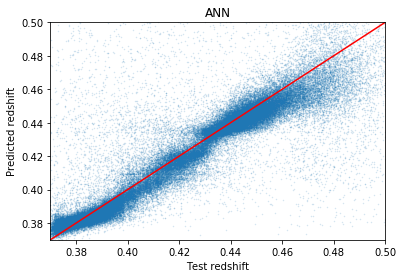

In [11]:
#Plotting the Results-Graph-1
fig = plt.figure()
ax1 = fig.add_subplot(111)
plt.title("ANN")
ax1.scatter(y_test, y_pred, alpha=0.2, s=0.2)
ax1.set_xlabel("Test redshift")
ax1.set_ylabel("Predicted redshift")
ax1.plot([0,.5], [0,.5], '-r')
ax1.set_xlim(0.37, .5)
ax1.set_ylim(0.37, .5)
plt.show()

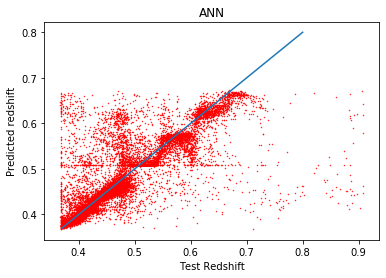

In [12]:
#plotting the results-Graph-2
plt.scatter(y_test.tolist()[:25000], y_pred.tolist()[:25000], s=0.2, color="red")
plt.plot([0.37, 0.8], [0.37, 0.8])
plt.xlabel("Test Redshift")
plt.ylabel("Predicted redshift")
plt.title("ANN")
plt.show()

In [13]:
#Evaluating the model
from sklearn import metrics
from math import sqrt

var = metrics.explained_variance_score(y_test, y_pred)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rms = sqrt(metrics.mean_squared_error(y_test, y_pred))
bias = (1/N)*sum(((np.subtract(y_pred.tolist()[:25000],y_test.tolist()[:25000]))/(np.subtract(1,y_test.tolist()[:25000]))), N-train_no)

print ('Explained variance (best possible score is 1.0, lower values are worse):', var)
print ('Mean Absolute Error (best is 0.0):', mae)
print ('Mean Squared Error (best is 0.0):', mse)
print ('R2 score (best is 1.0):', r2)
print ('RMS Score :', rms)
print('Model Bias Score:', bias.mean())

Explained variance (best possible score is 1.0, lower values are worse): 0.6746502548947667
Mean Absolute Error (best is 0.0): 0.017670324728084927
Mean Squared Error (best is 0.0): 0.0018217058579588989
R2 score (best is 1.0): 0.6746311525065993
RMS Score : 0.042681446296475224
Model Bias Score: 0.24860908666767795
